In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt


# own module
from utility.utils import compute_empirical_hurst_exponent
from simulations.fractional_brownian import (
    generate_brownian_path,
)

# Idées

- Vol sto
- Données réelles avec exposant de Hurst cross section
  $$\hat{H}=-\frac{1}{2log(2)}log(\frac{1}{2}\frac{\sum_{i=0}^{N-1}(B_H((i+1)/N)-B_H(i/N))^2}{\sum_{i=0}^{(N/2)-1}(B_H(2(i+1)/N)-B_H(2i/N))^2})$$
- Prouver arbitrage pourquoi H>0.5 fonctionne et pas H=0.5 (dominance sto ?)
-


# Fourier sur fBm

Generating 2 fBm with different $H$ in order to analyze their frequency spectrum.


In [2]:
t, s_t_trendy = generate_brownian_path(
    n_steps=250,
    T=1,
    H=0.8,
    mu=0.15,
    sigma=0.2,
    s0=100,
    brownian_type="fractional",
    fbm_simulation_method="cholesky",
)


t, s_t_meanrevert = generate_brownian_path(
    n_steps=250,
    T=1,
    H=0.2,
    mu=0.15,
    sigma=0.2,
    s0=100,
    brownian_type="fractional",
    fbm_simulation_method="cholesky",
)

In [3]:
fft_meanrevert = np.fft.rfft(s_t_meanrevert)  # Frequency amplitude
fft_trendy = np.fft.rfft(s_t_trendy)  # Frequency amplitude

fft_frequencies = np.fft.rfftfreq(
    n=s_t_trendy.shape[0], d=1 / (252)
)  # Corresponding frequencies

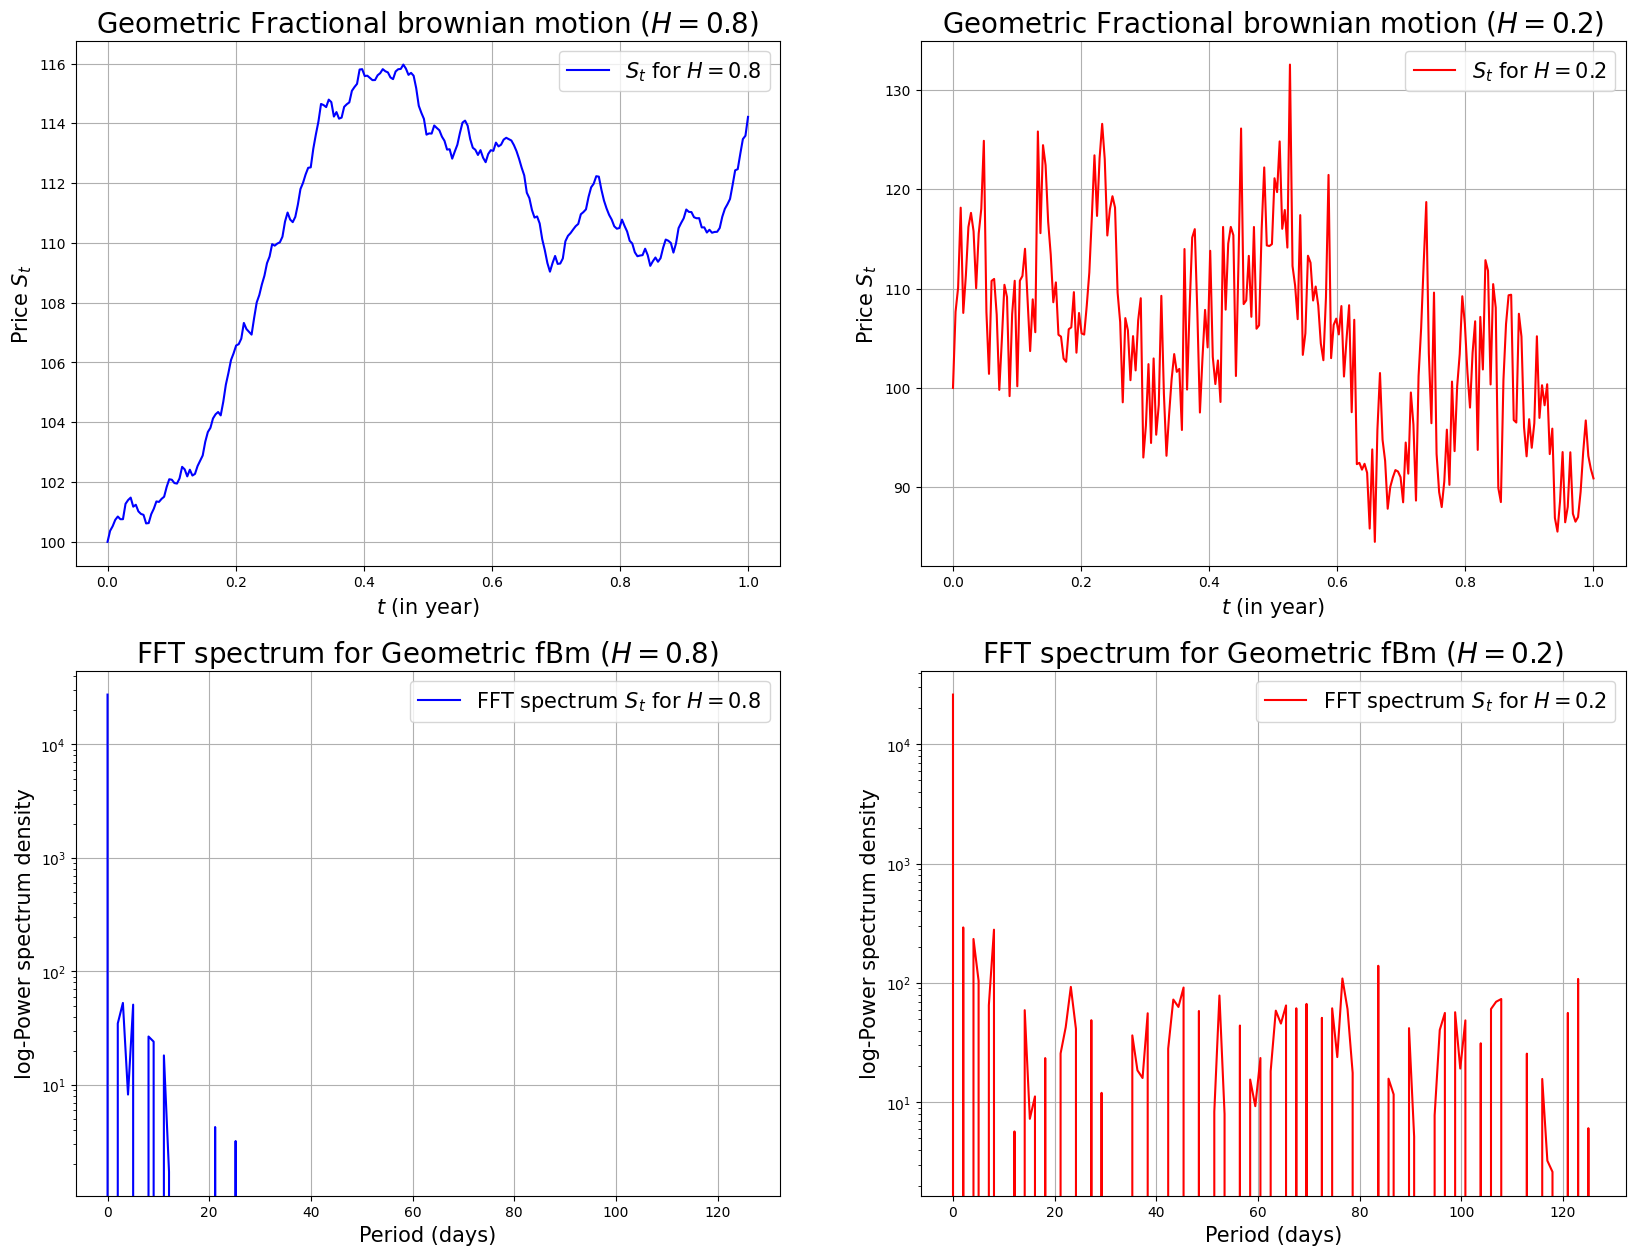

In [4]:
_, (ax1, ax2) = plt.subplots(2, 2, figsize=(20, 15))

ax1[0].plot(
    t,
    s_t_trendy,
    color="blue",
    label="$S_t$ for $H=0.8$",
)
ax1[0].set_xlabel("$t$ (in year)", fontsize=15)
ax1[0].set_ylabel("Price $S_t$", fontsize=15)
ax1[0].set_title(f"Geometric Fractional brownian motion ($H=0.8$)", fontsize=20)
ax1[0].grid()
ax1[0].legend(fontsize=15)
ax1[1].plot(
    t,
    s_t_meanrevert,
    color="red",
    label="$S_t$ for $H=0.2$",
)
ax1[1].set_xlabel("$t$ (in year)", fontsize=15)
ax1[1].set_ylabel("Price $S_t$", fontsize=15)
ax1[1].set_title(f"Geometric Fractional brownian motion ($H=0.2$)", fontsize=20)
ax1[1].grid()
ax1[1].legend(fontsize=15)
ax2[0].plot(
    fft_frequencies,
    fft_trendy.real,
    color="blue",
    label="FFT spectrum $S_t$ for $H=0.8$",
)

ax2[0].set_xlabel("Period (days)", fontsize=15)
ax2[0].set_ylabel("log-Power spectrum density", fontsize=15)
ax2[0].set_title(f"FFT spectrum for Geometric fBm ($H=0.8$)", fontsize=20)
ax2[0].grid()
ax2[0].set_yscale("log")
ax2[0].legend(fontsize=15)
ax2[1].plot(
    fft_frequencies,
    fft_meanrevert.real,
    color="red",
    label="FFT spectrum $S_t$ for $H=0.2$",
)

ax2[1].set_xlabel("Period (days)", fontsize=15)
ax2[1].set_ylabel("log-Power spectrum density", fontsize=15)
ax2[1].set_title(f"FFT spectrum for Geometric fBm ($H=0.2$)", fontsize=20)
ax2[1].grid()
ax2[1].set_yscale("log")
ax2[1].legend(fontsize=15)

In [5]:
compute_empirical_hurst_exponent(s_t_trendy,t), compute_empirical_hurst_exponent(s_t_meanrevert,t)

(0.7902751809879107, 0.2462094507838384)